In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
import seaborn as sns

# Data Spliting

## 1. Training Set

In [2]:
train_set_32 = image_dataset_from_directory(
    "dataset/train",
    labels="inferred",
    label_mode="categorical",
    class_names=["Negative", "Positive"],
    image_size=(64, 64),
    shuffle=True,
    seed=1,
    subset="training",
    validation_split=0.1,
    batch_size=32
)

train_set_128 = image_dataset_from_directory(
    "dataset/train",
    labels="inferred",
    label_mode="categorical",
    class_names=["Negative", "Positive"],
    image_size=(64, 64),
    shuffle=True,
    seed=1,
    subset="training",
    validation_split=0.1,
    batch_size=128
)

Found 32000 files belonging to 2 classes.
Using 28800 files for training.
Found 32000 files belonging to 2 classes.
Using 28800 files for training.


## 2. Validation Set

In [3]:
val_set_32 = image_dataset_from_directory(
    "dataset/train",
    labels="inferred",
    label_mode="categorical",
    class_names=["Negative", "Positive"],
    image_size=(64, 64),
    shuffle=True,
    seed=1,
    subset="validation",
    validation_split=0.1,
    batch_size=32
)

val_set_128 = image_dataset_from_directory(
    "dataset/train",
    labels="inferred",
    label_mode="categorical",
    class_names=["Negative", "Positive"],
    image_size=(64, 64),
    shuffle=True,
    seed=1,
    subset="validation",
    validation_split=0.1,
    batch_size=128
)

Found 32000 files belonging to 2 classes.
Using 3200 files for validation.
Found 32000 files belonging to 2 classes.
Using 3200 files for validation.


## Testing Set

In [4]:
test_set_32 = image_dataset_from_directory(
    "dataset/test",
    labels="inferred",
    label_mode="categorical",
    class_names=["Negative", "Positive"],
    image_size=(64, 64),
    shuffle=True,
    seed=1,
    batch_size=32
)

test_set_128 = image_dataset_from_directory(
    "dataset/test",
    labels="inferred",
    label_mode="categorical",
    class_names=["Negative", "Positive"],
    image_size=(64, 64),
    shuffle=True,
    seed=1,
    batch_size=128
)

Found 8000 files belonging to 2 classes.
Found 8000 files belonging to 2 classes.


### Kelas yang digunakan

In [5]:
classes = train_set_32.class_names

classes

['Negative', 'Positive']

In [6]:
for images, labels in train_set_32.take(9):
#     print(image.numpy())
    print(labels[1].numpy())
    break

[0. 1.]


### Shape Gambar

In [7]:
for images, labels in train_set_32.take(1):
    print(images.shape)
    print(labels.shape)
    break

(32, 64, 64, 3)
(32, 2)


## Preview Gambar

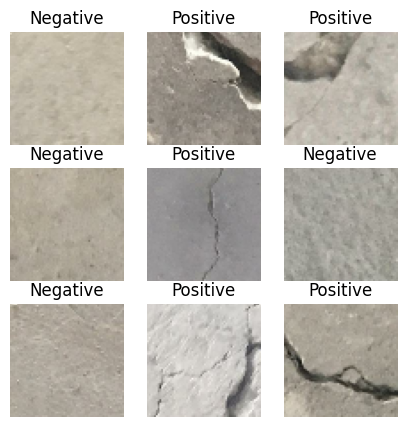

In [7]:
import matplotlib.pyplot as plt

def preview_imgs(dataset):
    plt.figure(figsize=(5, 5))

    # ambil batch 1
    for images, labels in dataset.take(1):
        
        # ambil 9 gambar
        for i in range(9):
            plt.subplot(3, 3, i+1)
            plt.imshow(images[i].numpy().astype("uint8"))

            plt.title("Negative") if labels[i].numpy()[0] == 1 else plt.title("Positive")

            plt.axis("off")

            
preview_imgs(train_set_32)

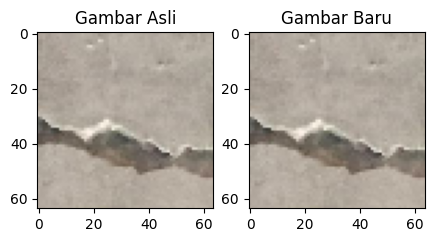

In [8]:
def sample_img(image1, image2):
    plt.figure(figsize=(5, 5))
    
    plt.subplot(1, 2, 1)
    plt.title("Gambar Asli")
    plt.imshow(image1.numpy().astype("uint8"))
    
    plt.subplot(1, 2, 2)
    plt.title("Gambar Baru")
    plt.imshow(image2.numpy().astype("uint8"))

# ambil 1 contoh gambar
for images, labels in train_set_32.take(1):
    ori_img = images[0]

sample_img(ori_img, ori_img)

# Preprocessing Images

## 1. Grayscale
Membuat gambar skala abu-abu

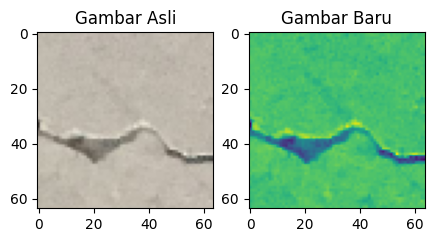

In [10]:
sample_img(ori_img, tf.image.rgb_to_grayscale(ori_img))

#### Grayscale Seluruh Gambar

In [5]:
def grayscale(x, y):
    image = tf.image.rgb_to_grayscale(x)
    return image, y

gray_train_32 = train_set_32.map(grayscale)
gray_val_32 = val_set_32.map(grayscale)
gray_test_32 = test_set_32.map(grayscale)

gray_train_128 = train_set_128.map(grayscale)
gray_val_128 = val_set_128.map(grayscale)
gray_test_128 = test_set_128.map(grayscale)


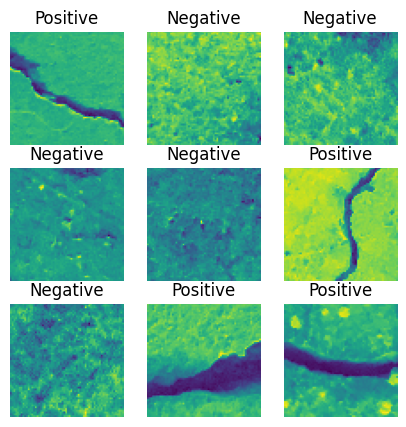

In [9]:
preview_imgs(gray_train_32)

In [10]:
for image, label in gray_train_32.take(1):
    print(image.numpy().shape)
    break

(32, 64, 64, 1)


## 2. Contrast
Meningkatkan perbedaan antara bagian yang lebih cerah dan lebih gelap

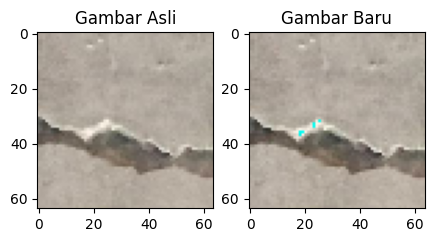

In [11]:
sample_img(ori_img, tf.image.random_contrast(ori_img, 1, 1.5, seed=1))

#### Kontraskan Seluruh Gambar Grayscale

In [13]:
def contrast(x, y):
    image = tf.image.random_contrast(x, 1, 1.5, seed=1)
    return image, y

contrast_train_32 = gray_train_32.map(contrast)
contrast_val_32 = gray_val_32.map(contrast)
contrast_test_32 = gray_test_32.map(contrast)

contrast_train_128 = gray_train_128.map(contrast)
contrast_val_128 = gray_val_128.map(contrast)
contrast_test_128 = gray_test_128.map(contrast)


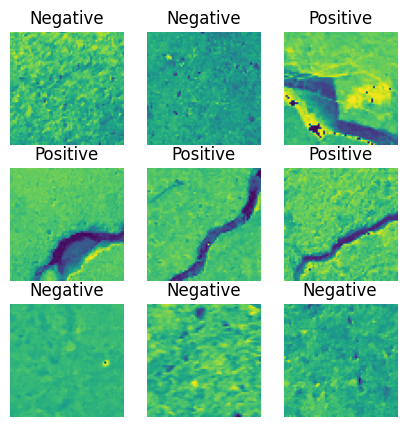

In [14]:
preview_imgs(contrast_train_32)

#### Kontraskan Seluruh Gambar Train Set Asli

In [16]:
contrast_train_32 = train_set_32.map(contrast)
contrast_val_32 = val_set_32.map(contrast)
contrast_test_32 = gray_test_32.map(contrast)

contrast_train_128 = gray_train_128.map(contrast)
contrast_val_128 = gray_val_128.map(contrast)
contrast_test_128 = gray_test_128.map(contrast)

preview_imgs(contrasted_train_set2)

NameError: name 'train_set' is not defined

## 3. Brightness
Sesuaikan kecerahan gambar

In [ ]:
sample_img(ori_img, tf.image.random_brightness(ori_img, max_delta=10, seed=1))

#### Cerahkan Seluruh Gambar Train Set Asli

In [ ]:
def brightness(x, y):
    image = tf.image.random_brightness(x, max_delta=10, seed=1)
    return image, y

brightness_train_set = train_set.map(brightness)
brightness_test_set = train_set.map(brightness)

preview_imgs(brightness_train_set)

# 3. Hue
Memberikan nuansa warna baru pada gambar

In [ ]:
sample_img(ori_img, tf.image.random_hue(ori_img, max_delta=0.5, seed=1))

#### Hue Seluruh Gambar Train Set Asli

In [ ]:
def hue(x, y):
    image = tf.image.random_hue(x, max_delta=0.5, seed=1)
    return image, y
    
hued_train_set = train_set.map(hue)
hued_test_set = train_set.map(hue)

preview_imgs(hued_train_set)

## 4. Saturation
Menyesuaikan insensitas warna. Semakin tinggi saturasi, semakin terang

In [ ]:
sample_img(ori_img, tf.image.random_saturation(ori_img, 0.5, 1.5, seed=1))

#### Saturasi Seluruh Gambar Train Set Asli

In [ ]:
def saturate(x, y):
    image = tf.image.random_saturation(x, 0.5, 1.5, seed=1)
    return image, y
    
saturated_train_set = train_set.map(hue)
saturated_test_set = train_set.map(hue)

preview_imgs(saturated_train_set)

# Modelling

In [23]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Input((64, 64, 1)),
    
#     tf.keras.layers.Conv2D(16, 3, activation="relu"),
#     tf.keras.layers.Conv2D(32, 3, activation="relu"),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Flatten(),
    
#     tf.keras.layers.Dense(2, activation="sigmoid", )
# ])

# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 2)                 57602     
                                                                 
Total params: 62,402
Trainable params: 62,402
Non-trainable params: 0
____________________________________________________

## 1. Model Grayscale-1

In [15]:
model_gray = Sequential([
    Conv2D(64, (3, 3), activation="relu", input_shape=[64, 64, 1]),
    MaxPooling2D(2, 2),
    
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Conv2D(16, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    
    Dense(2, activation="sigmoid")
])

model_gray.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 16)         0

### Model Grayscale-1 - Optimalisasi Model

In [16]:
model_gray.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

### Model Grascale-1 32 - Fitting Model

In [19]:
history_gray_32 = model_gray.fit(
    contrast_train_32,
    validation_data=contrast_val_32,
    epochs=10,
    verbose=1
)

Epoch 1/10
900/900 [==============================] - 168s 185ms/step - loss: 0.3311 - accuracy: 0.9485 - val_loss: 0.1705 - val_accuracy: 0.9784
Epoch 2/10
900/900 [==============================] - 168s 186ms/step - loss: 0.1533 - accuracy: 0.9681 - val_loss: 0.2577 - val_accuracy: 0.9653
Epoch 3/10
900/900 [==============================] - 170s 188ms/step - loss: 0.0982 - accuracy: 0.9786 - val_loss: 0.0958 - val_accuracy: 0.9822
Epoch 4/10
900/900 [==============================] - 177s 197ms/step - loss: 0.0719 - accuracy: 0.9817 - val_loss: 0.1063 - val_accuracy: 0.9775
Epoch 5/10
900/900 [==============================] - 169s 187ms/step - loss: 0.0529 - accuracy: 0.9860 - val_loss: 0.0604 - val_accuracy: 0.9862
Epoch 6/10
900/900 [==============================] - 169s 187ms/step - loss: 0.0382 - accuracy: 0.9902 - val_loss: 0.0434 - val_accuracy: 0.9887
Epoch 7/10
900/900 [==============================] - 170s 189ms/step - loss: 0.0294 - accuracy: 0.9925 - val_loss: 0.0352 -

### Model Grayscale-1 32 - Visualisasi

In [18]:
def visualisasi_plot(model):
    epoch = [i+1 for i in range(10)]

    sns.set_theme()

    plt.figure(figsize=(16, 9))
    plt.suptitle("Train vs Validation")

    # grafik akurasi
    plt.subplot(1, 2, 1)
    plt.title("Akurasi")
    sns.lineplot(
        x=epoch,
        y=model.history["accuracy"],
        label="Training"
    )
    sns.lineplot(
        x=epoch,
        y=model.history["val_accuracy"],
        label="Validation"
    )
    plt.xticks(epoch)
    plt.xlabel("Epoch")
    plt.ylabel("Akurasi(%)")

    # grafik loss
    plt.subplot(1, 2, 2)
    plt.title("Loss")
    sns.lineplot(
        x=epoch,
        y=model.history["loss"],
        label="Training"
    )
    sns.lineplot(
        x=epoch,
        y=model.history["val_loss"],
        label="Validation"
    )
    plt.xticks(epoch)
    plt.xlabel("Epoch")
    plt.ylabel("Loss(%)")

    plt.show()

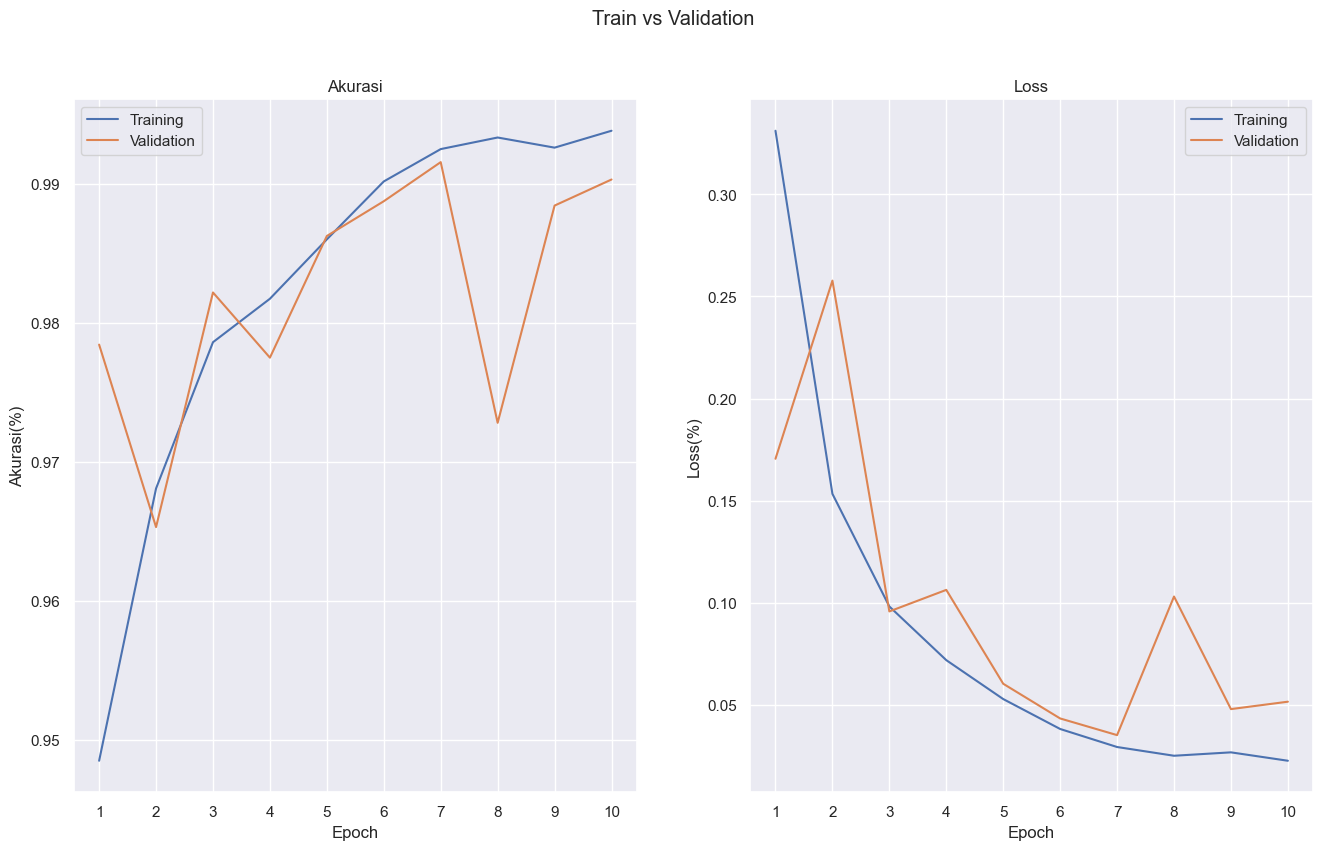

In [21]:
visualisasi_plot(history_gray_32)

### Model Grascale-1 128 - Fitting Model

In [17]:
history_gray_128 = model_gray.fit(
    contrast_train_128,
    validation_data=contrast_val_128,
    epochs=10,
    verbose=1
)

Epoch 1/10
225/225 [==============================] - 86s 379ms/step - loss: 0.2912 - accuracy: 0.9415 - val_loss: 0.1780 - val_accuracy: 0.9709
Epoch 2/10
225/225 [==============================] - 141s 623ms/step - loss: 0.0904 - accuracy: 0.9760 - val_loss: 0.2071 - val_accuracy: 0.9572
Epoch 3/10
225/225 [==============================] - 155s 683ms/step - loss: 0.0777 - accuracy: 0.9797 - val_loss: 0.0540 - val_accuracy: 0.9850
Epoch 4/10
225/225 [==============================] - 168s 740ms/step - loss: 0.0480 - accuracy: 0.9859 - val_loss: 0.0800 - val_accuracy: 0.9806
Epoch 5/10
225/225 [==============================] - 164s 724ms/step - loss: 0.0561 - accuracy: 0.9842 - val_loss: 0.0496 - val_accuracy: 0.9856
Epoch 6/10
225/225 [==============================] - 234s 1s/step - loss: 0.0371 - accuracy: 0.9884 - val_loss: 0.0372 - val_accuracy: 0.9891
Epoch 7/10
225/225 [==============================] - 227s 977ms/step - loss: 0.0330 - accuracy: 0.9899 - val_loss: 0.0326 - val

### Model Grayscale-1 128 - Visualisasi

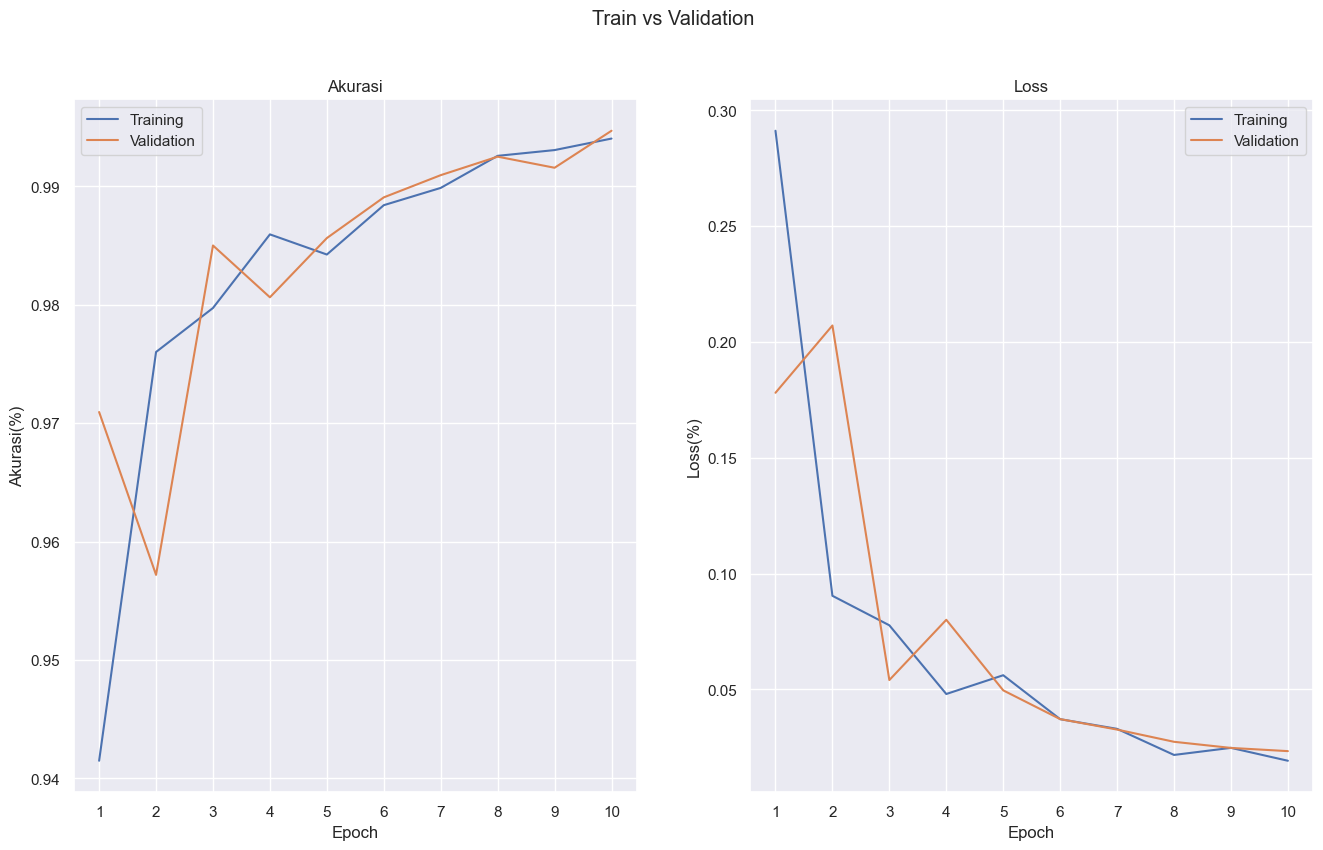

In [19]:
visualisasi_plot(history_gray_128)

## 2. Model Grayscale-2

In [31]:
model_gray2 = Sequential([
    Conv2D(16, (3, 3), activation="relu", input_shape=[64, 64, 1]),
    MaxPooling2D(2, 2),
    
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    
    Dense(2, activation="sigmoid")
])

model_gray2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 16)        160       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 6, 6, 64)        

In [22]:
model_gray2.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [23]:
history_gray_32_2 = model_gray2.fit(
    contrast_train_32,
    validation_data=contrast_val_32,
    epochs=10,
    verbose=1
)

Epoch 1/10
900/900 [==============================] - 38s 42ms/step - loss: 0.1444 - accuracy: 0.9695 - val_loss: 0.0472 - val_accuracy: 0.9872
Epoch 2/10
900/900 [==============================] - 50s 55ms/step - loss: 0.0525 - accuracy: 0.9851 - val_loss: 0.0478 - val_accuracy: 0.9878
Epoch 3/10
900/900 [==============================] - 61s 68ms/step - loss: 0.0586 - accuracy: 0.9844 - val_loss: 0.0582 - val_accuracy: 0.9869
Epoch 4/10
900/900 [==============================] - 89s 99ms/step - loss: 0.0344 - accuracy: 0.9907 - val_loss: 0.0290 - val_accuracy: 0.9900
Epoch 5/10
900/900 [==============================] - 97s 108ms/step - loss: 0.0301 - accuracy: 0.9920 - val_loss: 0.0362 - val_accuracy: 0.9894
Epoch 6/10
900/900 [==============================] - 91s 101ms/step - loss: 0.0208 - accuracy: 0.9943 - val_loss: 0.0267 - val_accuracy: 0.9928
Epoch 7/10
900/900 [==============================] - 91s 101ms/step - loss: 0.0210 - accuracy: 0.9943 - val_loss: 0.0188 - val_accura

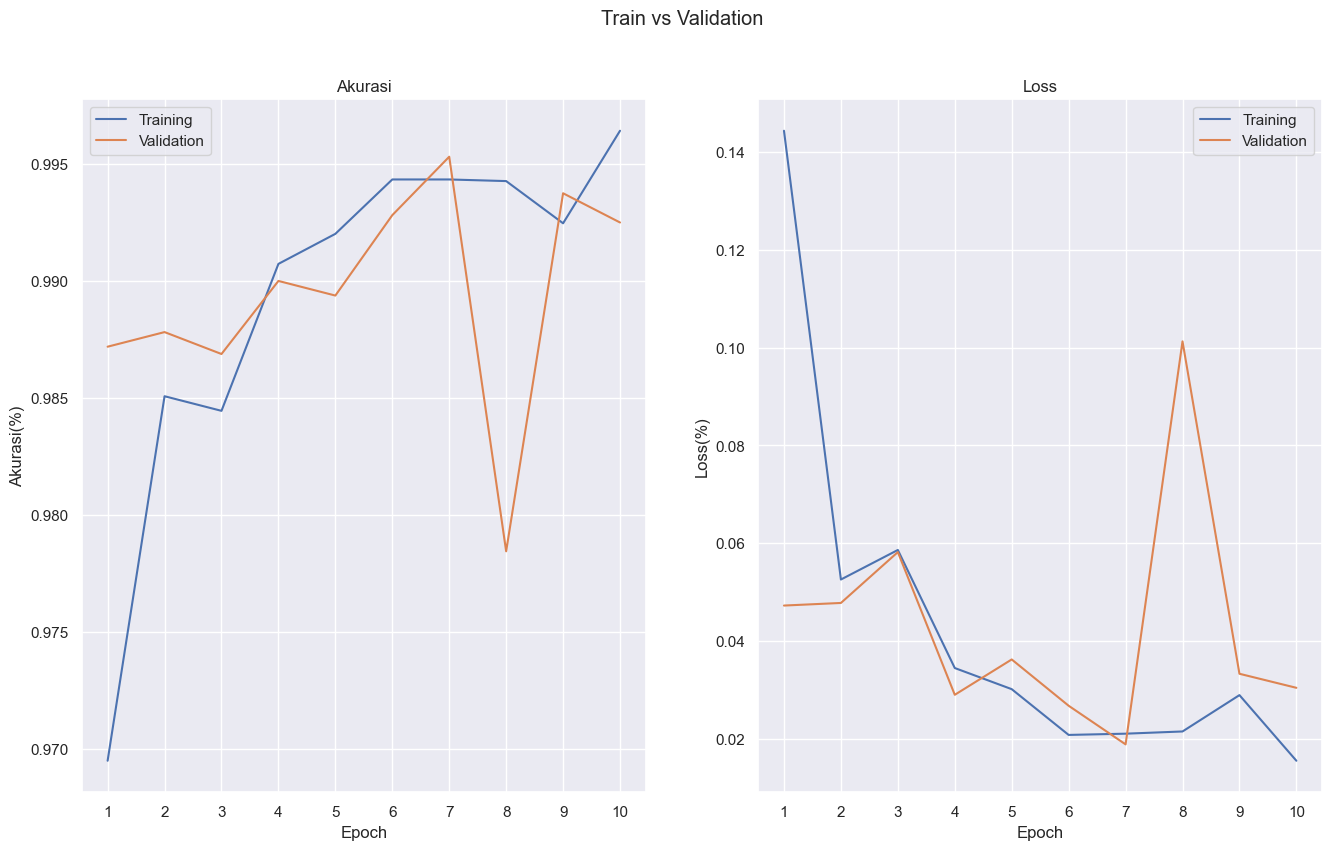

In [24]:
visualisasi_plot(history_gray_32_2)

In [25]:
history_gray_128_2 = model_gray2.fit(
    contrast_train_128,
    validation_data=contrast_val_128,
    epochs=10,
    verbose=1
)

Epoch 1/10
225/225 [==============================] - 76s 332ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.0171 - val_accuracy: 0.9956
Epoch 2/10
225/225 [==============================] - 76s 334ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.0112 - val_accuracy: 0.9975
Epoch 3/10
225/225 [==============================] - 76s 335ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0095 - val_accuracy: 0.9969
Epoch 4/10
225/225 [==============================] - 76s 333ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0097 - val_accuracy: 0.9956
Epoch 5/10
225/225 [==============================] - 76s 335ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.0102 - val_accuracy: 0.9972
Epoch 6/10
225/225 [==============================] - 76s 333ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0134 - val_accuracy: 0.9972
Epoch 7/10
225/225 [==============================] - 76s 333ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0131 - val_ac

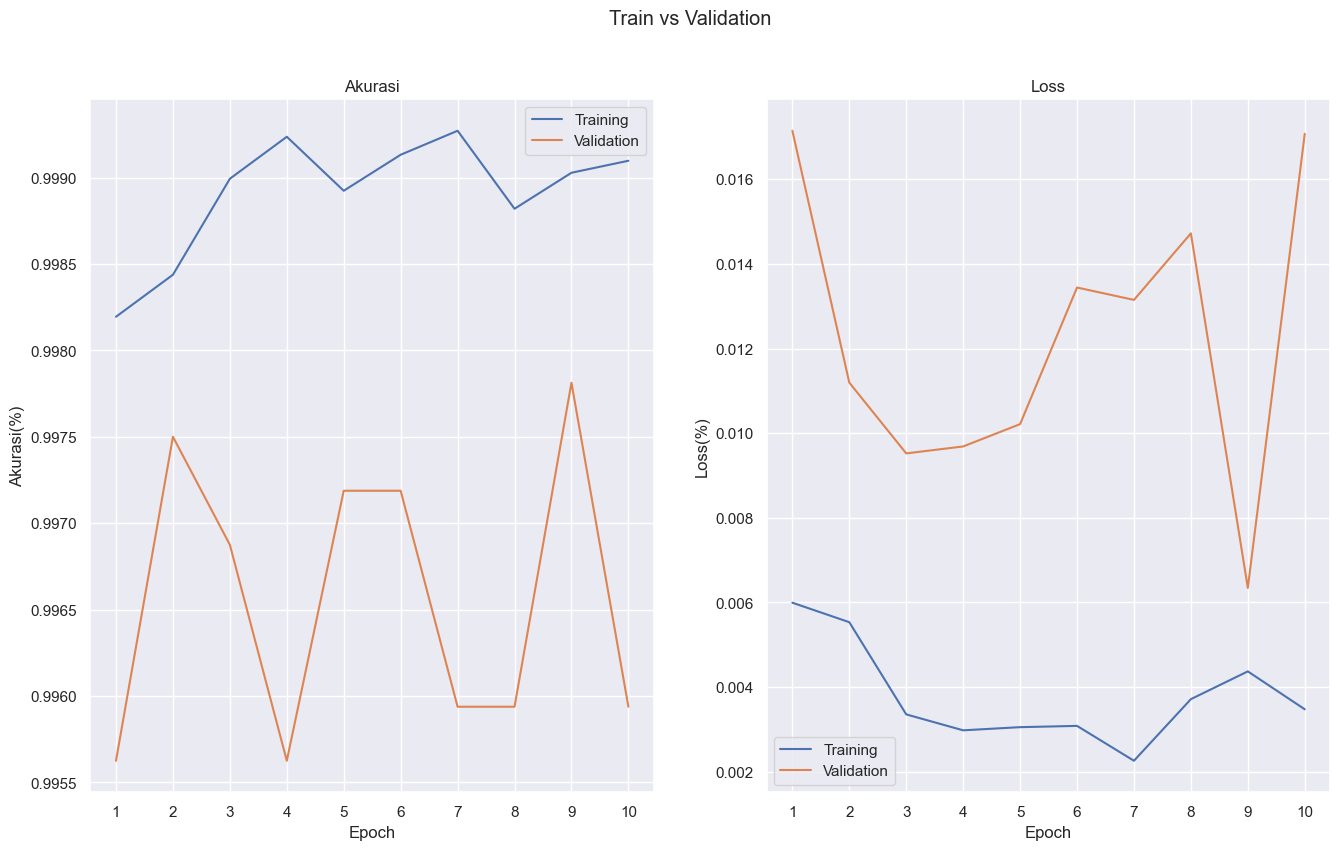

In [26]:
visualisasi_plot(history_gray_128_2)

## 3. Model RGB-1

In [37]:
model_rgb = Sequential([
    Conv2D(64, (3, 3), activation="relu", input_shape=[64, 64, 3]),
    MaxPooling2D(2, 2),
    
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Conv2D(16, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    
    Dense(2, activation="sigmoid")
])

model_rgb.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 16)        4624      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 6, 6, 16)        

In [38]:
model_rgb.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

### Model RGB-1 32 - Fitting Model

In [39]:
history_rgb_32 = model_rgb.fit(
    train_set_32,
    validation_data=val_set_32,
    epochs=10,
    verbose=1
)

Epoch 1/10
900/900 [==============================] - 173s 191ms/step - loss: 0.2225 - accuracy: 0.9335 - val_loss: 0.0702 - val_accuracy: 0.9784
Epoch 2/10
900/900 [==============================] - 171s 190ms/step - loss: 0.1611 - accuracy: 0.9679 - val_loss: 0.1660 - val_accuracy: 0.9759
Epoch 3/10
795/900 [=========================>....] - ETA: 21s - loss: 0.1036 - accuracy: 0.9853

KeyboardInterrupt: 

In [ ]:
visualisasi_plot(history_rgb_32)

### Model RGB-1 128 - Fitting Model

In [ ]:
history_rgb_128 = model_rgb.fit(
    train_set_128,
    validation_data=val_set_128,
    epochs=10,
    verbose=1
)

In [ ]:
visualisasi_plot(history_rgb_128)

### Model RGB-2 32 - Fitting Model

In [40]:
model_rgb2 = Sequential([
    Conv2D(16, (3, 3), activation="relu", input_shape=[64, 64, 3]),
    MaxPooling2D(2, 2),
    
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(2, activation="sigmoid")
])

model_rgb2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 31, 31, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 6, 6, 64)        

In [41]:
model_rgb2.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [42]:
history_rgb_128 = model_rgb2.fit(
    train_set_128,
    validation_data=val_set_128,
    epochs=10,
    verbose=1
)

Epoch 1/10
225/225 [==============================] - 86s 374ms/step - loss: 0.9355 - accuracy: 0.9453 - val_loss: 0.0561 - val_accuracy: 0.9834
Epoch 2/10
225/225 [==============================] - 81s 359ms/step - loss: 0.0446 - accuracy: 0.9873 - val_loss: 0.0653 - val_accuracy: 0.9862
Epoch 3/10
225/225 [==============================] - ETA: 0s - loss: 0.0329 - accuracy: 0.9905

KeyboardInterrupt: 